## **Import**

In [24]:
import cv2
import PIL
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io, color
# from google.colab.patches import cv2_show

## **Question1**

### **Image Quantization from Scratch**

In [12]:
img=cv2.imread("cameraman.jpg")
images=[]
def quantizer(img,L):
    h,w,c=img.shape
    Q=np.zeros((256,))
    y=np.zeros((h,w))
    B=256
    q=B/L
    for i in range(0,255):
        Q[i+1]=math.floor(i/q)*q+(q/2)
    for i in range(1,h):
        for j in range(1,w):
            y[i][j]=Q[img[i][j]+1][1]
    images.append(y)
    plt.figure()
    plt.imshow(y,cmap="gray")
    plt.show()

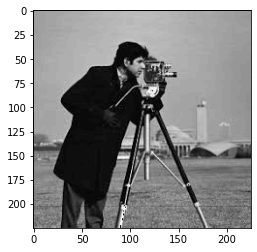

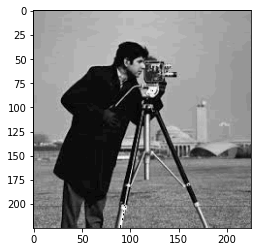

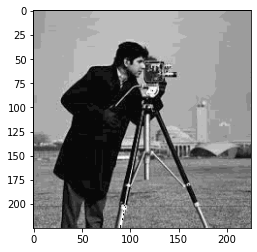

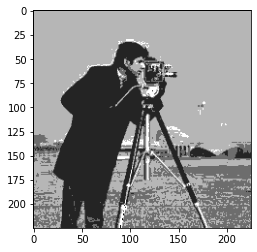

In [13]:
img_64 = quantizer(img,64)
img_32 = quantizer(img,32)
img_16 = quantizer(img,16)
img_4 = quantizer(img,4)

### **Image Quantization from function**

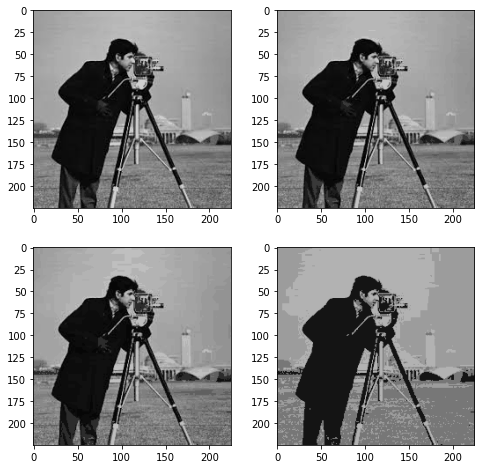

In [14]:
img = Image.open("cameraman.jpg")
imgL=[]
imgL.append(img.quantize(colors=64))
imgL.append(img.quantize(colors=32))
imgL.append(img.quantize(colors=16))
imgL.append(img.quantize(colors=4))

fig=plt.figure(figsize=(8, 8))
for i in range(1, 4 +1):
    fig.add_subplot(2, 2, i)
    plt.imshow(imgL[i-1])
plt.show()

### **MSE**

In [15]:
MSE = []
L = [64,32,16,4]
img=cv2.imread("cameraman.jpg")
lina_gray = color.rgb2gray(img)
for i in range(len(L)):
    MSE.append(np.square(np.subtract(lina_gray,(np.asarray(imgL[i]))).mean()))
print(MSE)

[968.429825977822, 199.99128201009816, 48.40751382578833, 1.0205294528873294]


## **Question2**

In [16]:
img=cv2.imread("cameraman.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
r ,bw_img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
bw_img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0, 255,   0],
       [255, 255, 255, ..., 255, 255,   0],
       [  0, 255, 255, ...,   0, 255,   0]], dtype=uint8)

### **a) Euclidean distance**

In [17]:
dst_euc = cv2.distanceTransform(bw_img,cv2.DIST_L1, 3)
dst_euc

array([[118., 117., 116., ..., 136., 136., 136.],
       [117., 116., 115., ..., 135., 135., 135.],
       [116., 115., 114., ..., 134., 134., 134.],
       ...,
       [  0.,   0.,   0., ...,   0.,   1.,   0.],
       [  1.,   1.,   1., ...,   1.,   1.,   0.],
       [  0.,   1.,   2., ...,   0.,   1.,   0.]], dtype=float32)

### **b) City- block distance**

In [18]:
dst_cb = cv2.distanceTransform(bw_img,cv2.DIST_L2, 3)
dst_cb

array([[80.7883    , 80.37401   , 79.95972   , ..., 97.184784  ,
        98.139786  , 99.09479   ],
       [80.37401   , 79.41901   , 79.004715  , ..., 96.77049   ,
        97.725494  , 98.6805    ],
       [79.41901   , 79.004715  , 78.04971   , ..., 96.3562    ,
        97.3112    , 98.266205  ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.95500183,  0.        ],
       [ 0.95500183,  0.95500183,  0.95500183, ...,  0.95500183,
         0.95500183,  0.        ],
       [ 0.        ,  0.95500183,  1.3692932 , ...,  0.        ,
         0.95500183,  0.        ]], dtype=float32)

### **c) Chessboard distance** **bold text**

In [19]:
dst_chess = cv2.distanceTransform(bw_img,cv2.DIST_C, 3)
dst_chess

array([[59., 59., 59., ..., 74., 75., 76.],
       [59., 58., 58., ..., 74., 75., 76.],
       [58., 58., 57., ..., 74., 75., 76.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 1.,  1.,  1., ...,  1.,  1.,  0.],
       [ 0.,  1.,  1., ...,  0.,  1.,  0.]], dtype=float32)

## **Question3**

In [28]:
def spatial(size):
    img = cv2.imread('cameraman.jpg', 0) 
    m, n = img.shape 

    mask = np.ones([size, size], dtype = int) 
    mask = mask / (size**2)  
    img_new = np.zeros([m, n]) 
    
    for i in range(1, m-1): 
        for j in range(1, n-1): 
            temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 
            
            img_new[i, j]= temp 
            
    img_new_3 = img_new.astype(np.uint8)
    plt.imshow(img_new_3,cmap="gray")

### **3x3**

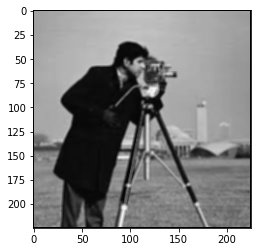

In [29]:
spatial(3)

### **5x5**

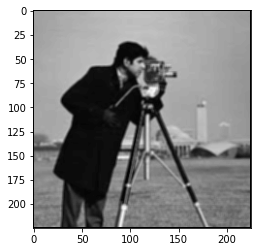

In [30]:
spatial(5)

### **7x7**

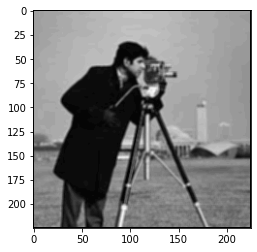

In [31]:
spatial(7)

### **study**

In [35]:
def study(size):
    %matplotlib inline
    image = cv2.imread('cameraman.jpg') # reads the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
    figure_size = size**2 # the dimension of the x and y axis of the kernal.
    new_image = cv2.blur(image,(figure_size, figure_size))
    plt.figure(figsize=(11,6))
    plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
    plt.xticks([]), plt.yticks([])
    plt.show()

### 3x3

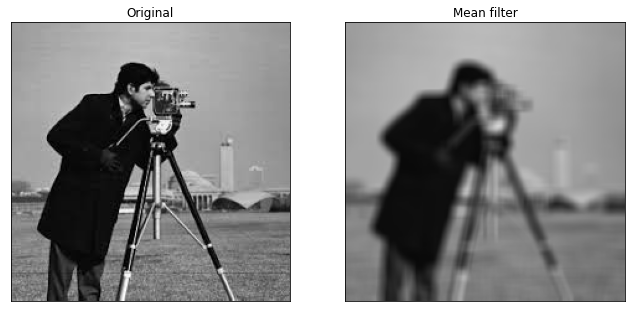

In [36]:
study(3)

### 5x5

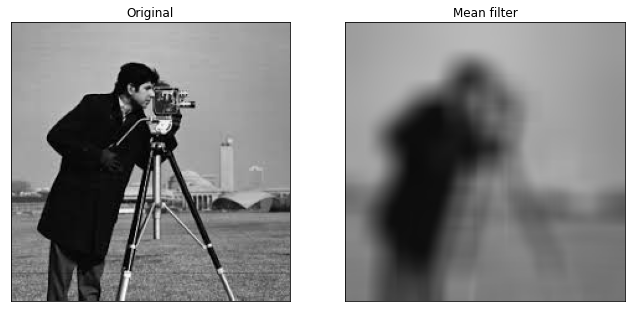

In [37]:
study(5)

### 7x7

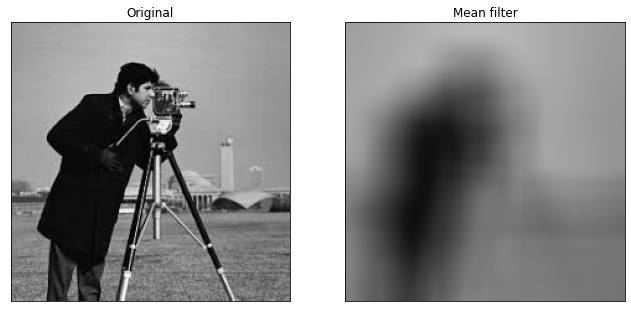

In [38]:
study(7)